# Exploratory data analysis with Python

Some of the default scikit learn datasets will be explores throughout this notebook.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
# Set seaborn style to plots and show them inline using magic commands
%matplotlib inline
sns.set()

## Load dataset

In [3]:
# Load the dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

## Data visualization

In [4]:
# Check the structure of the training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check the structure of the test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Check dataframe types and size
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# Check statistical properties
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


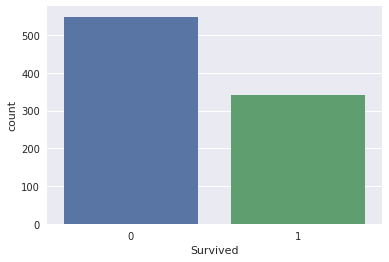

In [8]:
# Describe the amount of people who survived the Titanic incident. Zero represent people who didn't survived
sns.countplot(x='Survived', data=df_train)

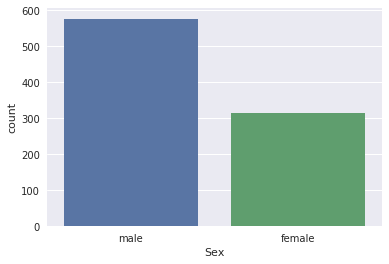

In [9]:
# Count the people that were on Titanic by gender
sns.countplot(x='Sex', data=df_train)

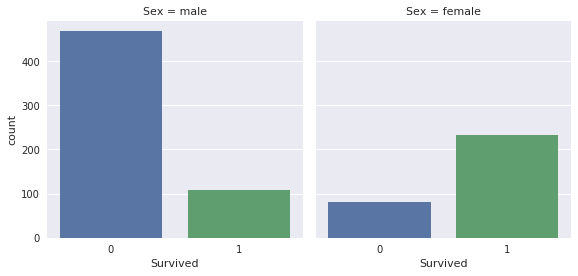

In [10]:
# Describe the amount of people that survived and the amount who didn't by gender
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train)

In [11]:
# Count the number of survivors by gender
df_train.groupby(['Sex'])['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [12]:
# Calculate the proportion of men and women that survived
p_women = df_train[df_train['Sex'] == 'female']['Survived'].sum() / df_train[df_train['Sex'] == 'female']['Survived'].count()
p_men = df_train[df_train['Sex'] == 'male']['Survived'].sum() / df_train[df_train['Sex'] == 'male']['Survived'].count()

print('Female survivors: ', p_women)
print('Male survivors: ', p_men)

Female survivors:  0.742038216561
Male survivors:  0.188908145581


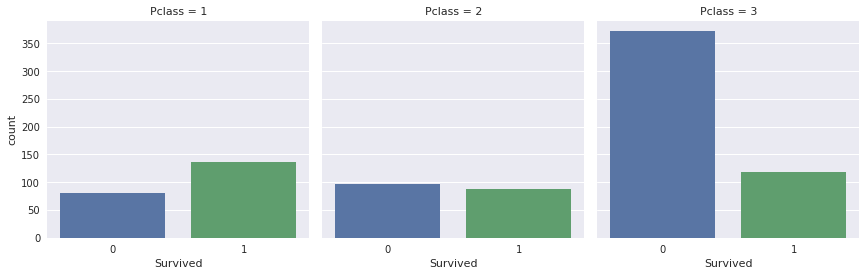

In [13]:
# Describe the amount of people who survived and the amount that didn't by class
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train)

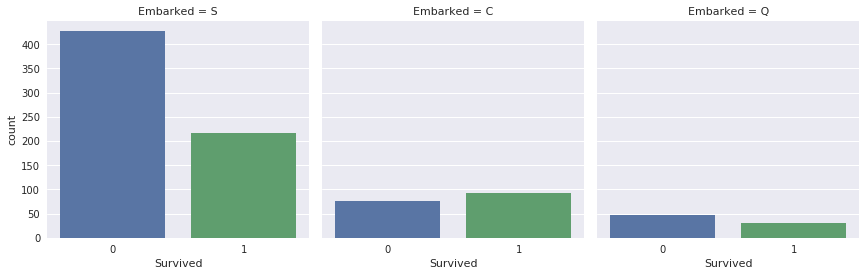

In [14]:
# Describe the amount of people who survived and the amount that didn't by embarked
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train)

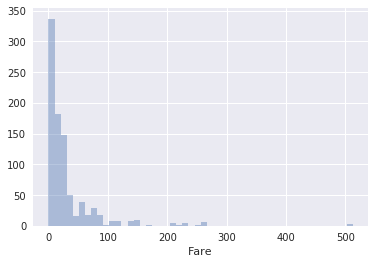

In [15]:
# Describe the distribution of prices per ticker. kde = False disable the distribution line
sns.distplot(df_train['Fare'], kde=False)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

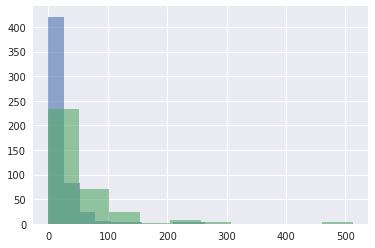

In [16]:
# Describe the amount of survivors by the fare they've paid to be on board
df_train.groupby('Survived')['Fare'].hist(alpha=0.6)

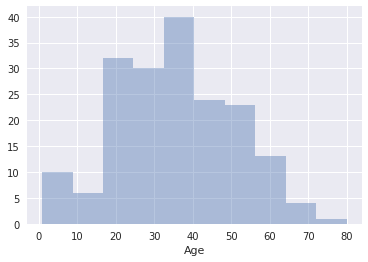

In [17]:
# Describe the distribution of ages
df_train_dropna = df_train.dropna()
sns.distplot(df_train_dropna['Age'], kde=False)

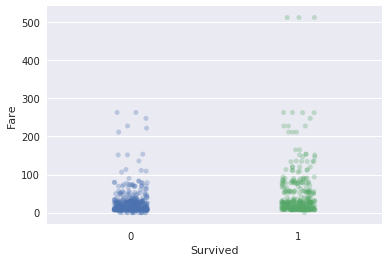

In [18]:
# Describe if people survived Titanic distributed by the amount they've paid
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True)

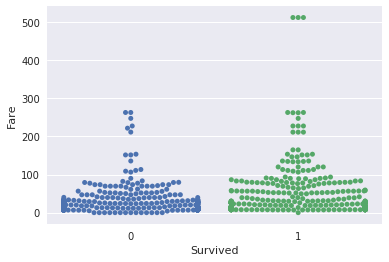

In [19]:
# Describe the same relationship as above using a swarmplot
sns.swarmplot(x='Survived', y='Fare', data=df_train)

In [20]:
# Describe statistics for ticked prices grouped by survived
df_train.groupby(['Survived'])['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


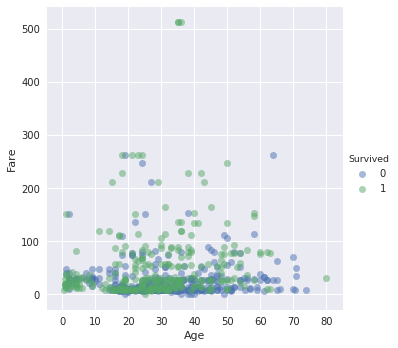

In [21]:
# Draw a scatter plot of age and fare grouped by survived. fit_reg describe the regression line. Extra parameters are passed through scatter_kws
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha': 0.5})

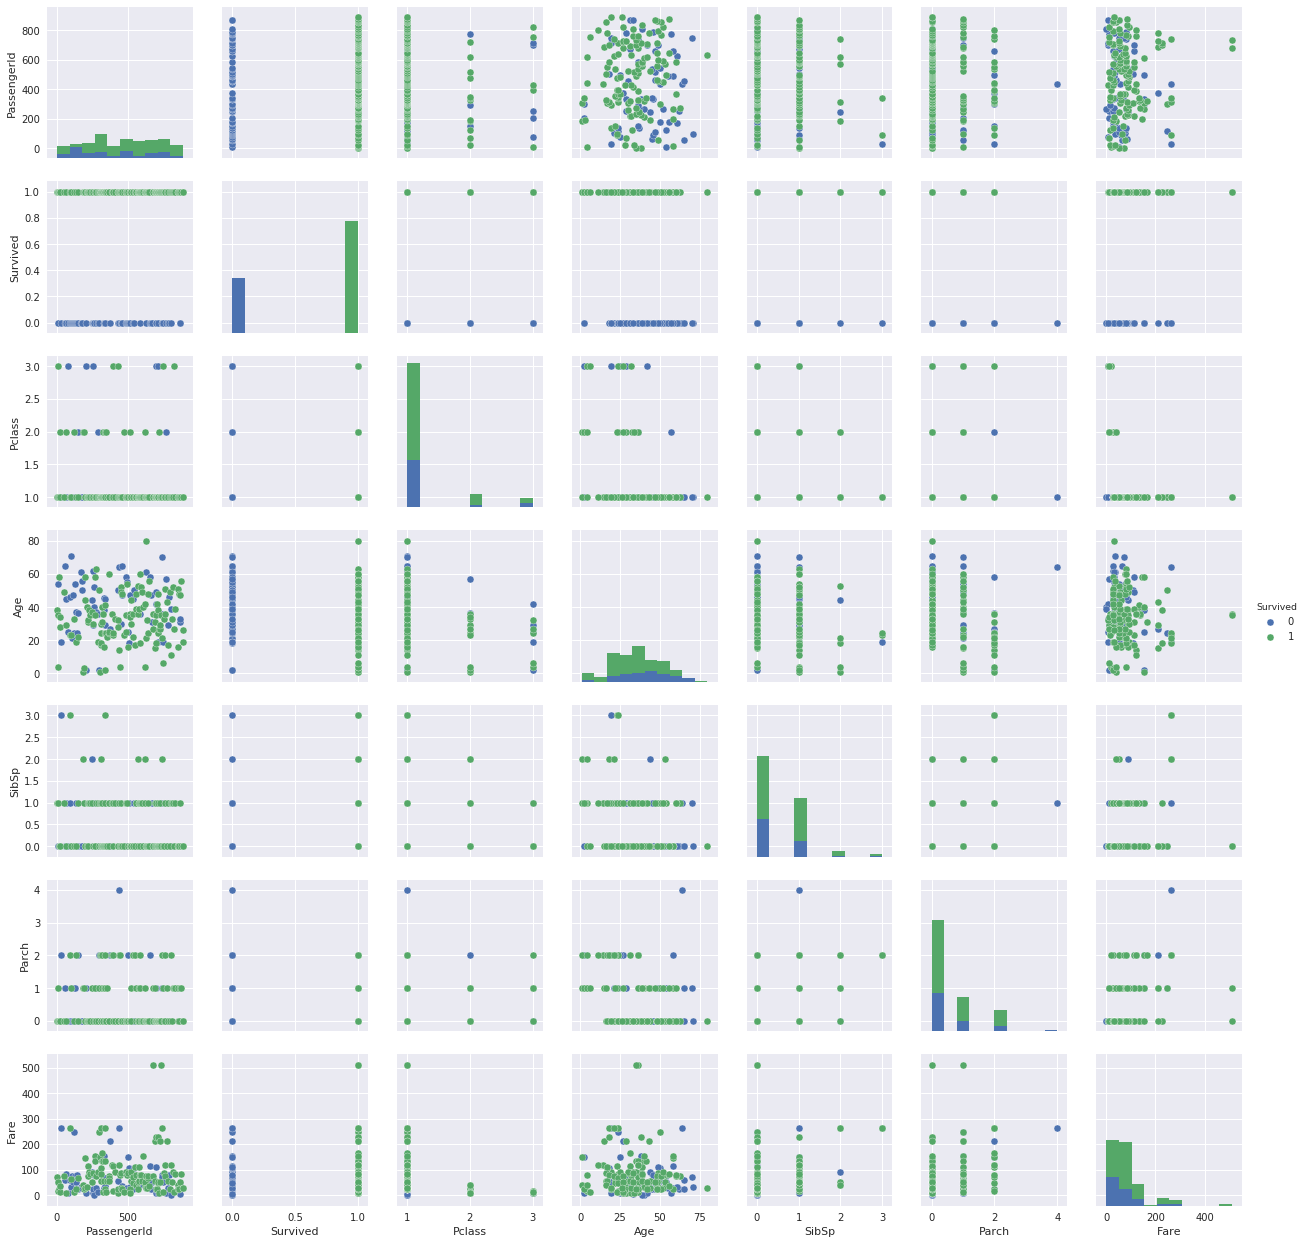

In [22]:
# Describe correlations among the data
sns.pairplot(df_train_dropna, hue='Survived')